# Ad clicker prediction

* 'Daily Time Spent on Site': time on site (minutes).
* 'Age': consumer age
* 'Area Income': Average consumer income in the regions
* 'Daily Internet Usage': Average time in minutos per day that the consumer is on web
* 'Linha do tópico do anúncio': Ad Title
* 'City': Consumer City
* 'Male': Consumer Sex
* 'Country': Consumer Country
* 'Timestamp': Hour which consumer clicked on add or closed the window
* 'Clicked on Ad'': 0 -> didn't click, 1->clicked

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
file = '//home//vinicius//Data_Science//Notebooks//Data_Files//advertising.csv'
df1 = pd.read_csv(file)

In [6]:
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


**Timestamp -> object(*)**  


In [9]:
df1.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

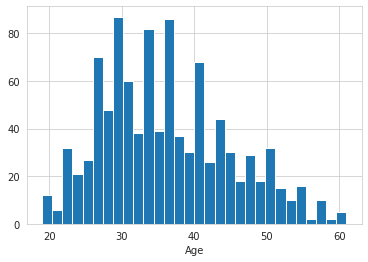

In [11]:
df1['Age'].hist(bins=30)
plt.xlabel('Age')

**Most consumers are between 25 and 40 years old**

<Figure size 864x576 with 0 Axes>

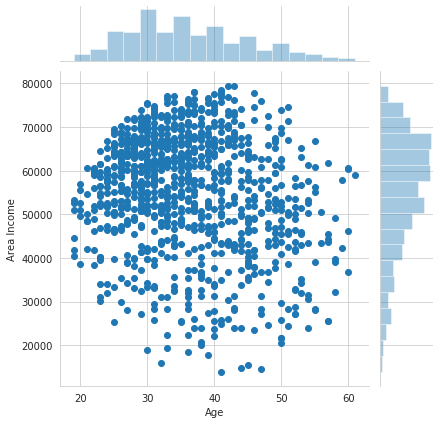

In [15]:
plt.figure(figsize=(12,8))
sns.jointplot(x='Age', y='Area Income', data=df1)

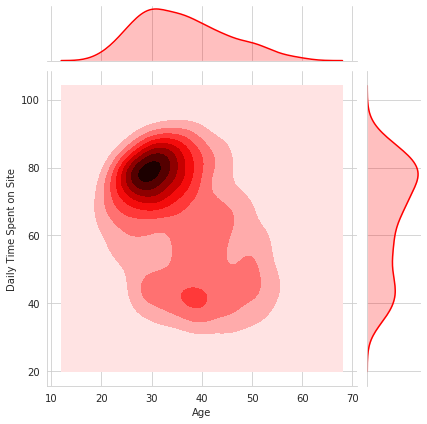

In [21]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',color='red', kind='kde',data=df1)

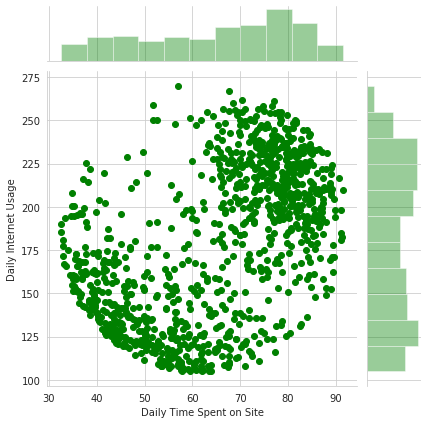

In [23]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage',data=df1,color='green')

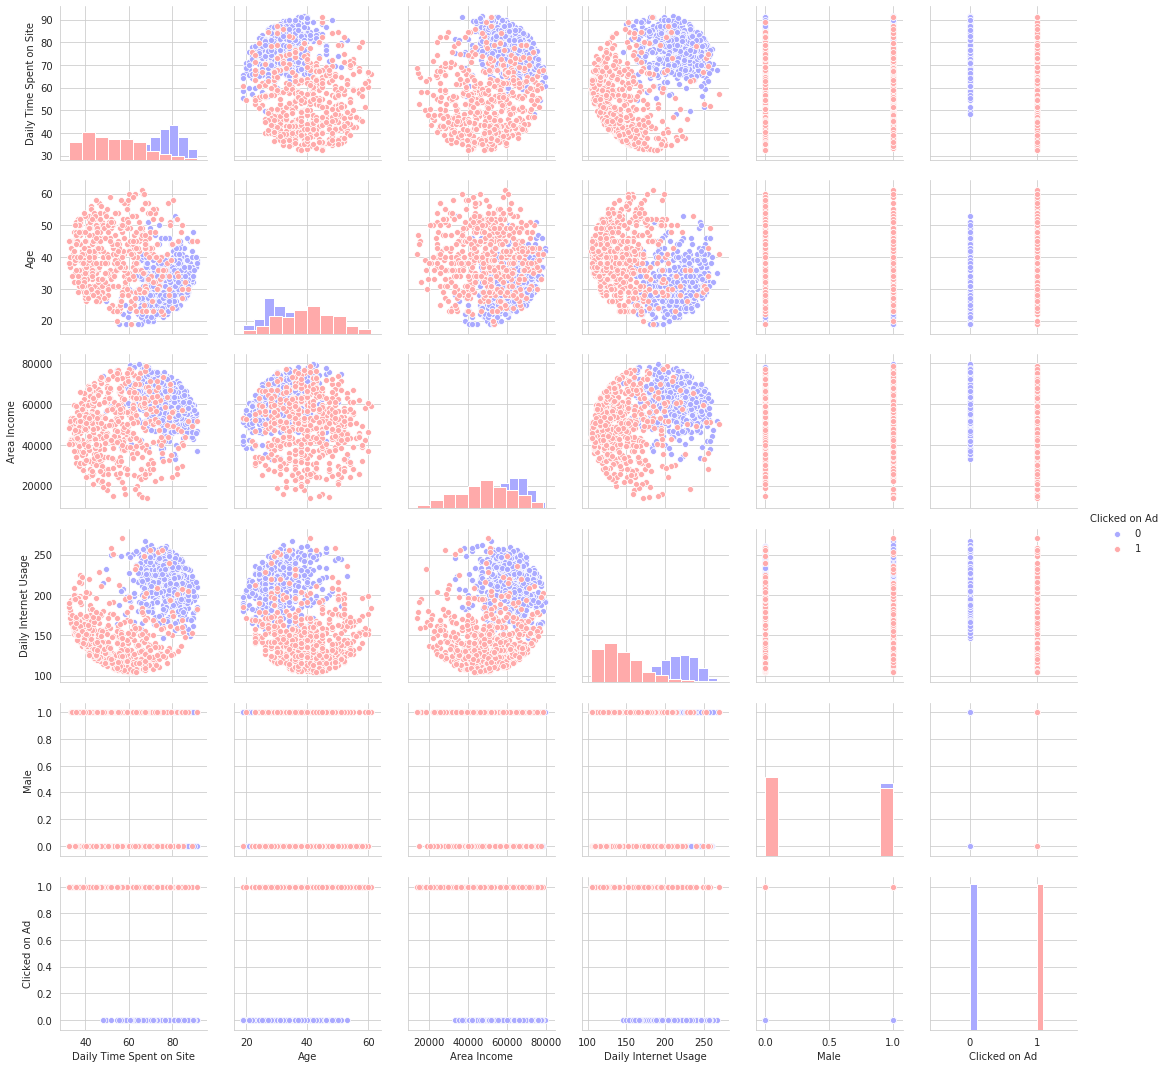

In [29]:
sns.pairplot(df1, hue='Clicked on Ad', palette='bwr', diag_kind='hist')

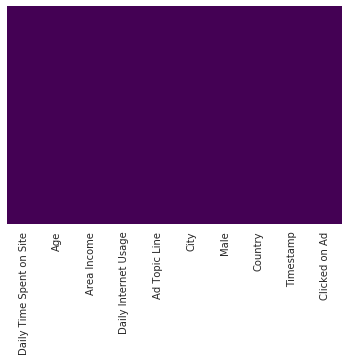

In [31]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis')  ## all data ok

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [51]:
x_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'] 
## just numbers values

x = df1[x_columns]
y = df1['Clicked on Ad']


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [57]:
logmodel = LogisticRegression(solver='lbfgs')

In [58]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
predictions = logmodel.predict(x_test)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



**Acurracy = 91%**
**If get acess to X infos when the person enter in the site we can 

In [61]:
print(confusion_matrix(y_test,predictions))

[[156   6]
 [ 25 143]]
